# <p style="text-align:center">Telecommunications customer churn prediction

A telecommunications company which is concerned about the number of customers leaving their land-line business for cable competitors, wants to understand who is more likely to leave the company.

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


### About the dataset
The data a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

The dataset is used for predicting customer churn. This is a historical customer dataset where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 
<br><br>
This data set provides you information about customer preferences, services opted, personal details, etc. which helps you predict customer churn.


A subset of the fields available is used to develop a model.Assuming the fields are 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' and of course 'churn'.

In [7]:
churn_df1 = churn_df.copy()
churn_df1 = churn_df1[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df1['churn'] = churn_df1['churn'].astype('int')
churn_df1

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


For modeling the input fields X and the target field y need to be fixed. Since that the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. Any combination or all of the remaining fields can be used as the input. These values are stored in the variable 'X'.


In [9]:
X = np.asarray(churn_df1[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5] 

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [10]:
y = np.asarray(churn_df1['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

The dataset is standardized or normalized  in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. 

In [12]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Splitting the dataset
The trained model has to be tested and evaluated on data which has not been used during training. Therefore, it is required to separate a part of the data for testing and the remaining for training. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Logistic Regression Classifier modeling

In [16]:
LR = LogisticRegression().fit(X_train,y_train)

In [17]:
# predicting the output variable
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Looking at the prediction probability of data point of the test data set by using the function __predict_proba__ , the probability of each class can be gotten. The first column is the probability of the record belonging to class 0, and second column that of class 1. The class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.

In [19]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

Since the purpose is to predict the 1 class more acccurately, what each input feature role has to play in the prediction of the 1 class is examined.

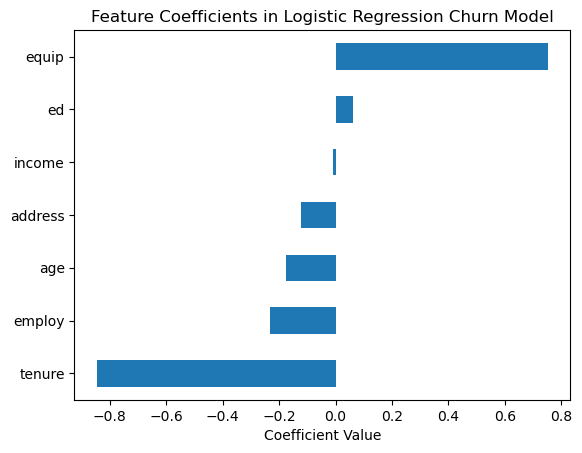

In [21]:
coefficients = pd.Series(LR.coef_[0], index=churn_df1.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. 

## Performance Evaluation
Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target variable. 

### log loss

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.


In [24]:
log_loss(y_test, yhat_prob)

0.6257718410257236

Adding the feature 'callcard' to the original set of input features and determining the value of log loss.

In [26]:
churn_df2 = churn_df.copy()
churn_df2 = churn_df2[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'churn']]
churn_df2['churn'] = churn_df2['churn'].astype('int')
churn_df2

,tenure,age,address,income,ed,employ,equip,callcard,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1


In [27]:
X = np.asarray(churn_df2[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard']])
X[0:5] 

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.]])

In [28]:
y = np.asarray(churn_df['churn'])
y[0:5] 

array([1., 1., 0., 0., 0.])

In [29]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

In [31]:
LR = LogisticRegression().fit(X_train,y_train)

In [32]:
yhat = LR.predict(X_test)
yhat[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [33]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.77047565, 0.22952435],
       [0.93543984, 0.06456016],
       [0.75062776, 0.24937224],
       [0.94883131, 0.05116869],
       [0.77117014, 0.22882986],
       [0.80793559, 0.19206441],
       [0.67970438, 0.32029562],
       [0.91850805, 0.08149195],
       [0.20574314, 0.79425686],
       [0.95243863, 0.04756137]])

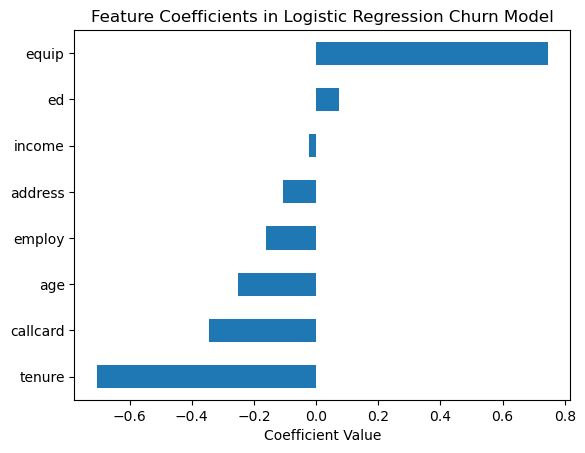

In [34]:
coefficients = pd.Series(LR.coef_[0], index=churn_df2.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [35]:
log_loss(y_test, yhat_prob)

0.6039104035600185

Adding the feature 'wireless' to the original set of input features and determining the value of log loss.

In [37]:
churn_df3 = churn_df.copy()
churn_df3 = churn_df3[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'churn']]
churn_df3['churn'] = churn_df3['churn'].astype('int')
churn_df3

,tenure,age,address,income,ed,employ,equip,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1


In [38]:
X = np.asarray(churn_df3[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless']])
X[0:5] 

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   0.]])

In [39]:
y = np.asarray(churn_df3['churn'])
y[0:5] 

array([1, 1, 0, 0, 0])

In [40]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695, -0.63910148]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

In [42]:
LR = LogisticRegression().fit(X_train,y_train)

In [43]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [44]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.82798355, 0.17201645],
       [0.83104398, 0.16895602],
       [0.83397446, 0.16602554],
       [0.95537594, 0.04462406],
       [0.86564499, 0.13435501],
       [0.71870566, 0.28129434],
       [0.83477142, 0.16522858],
       [0.79177102, 0.20822898],
       [0.37098795, 0.62901205],
       [0.89243731, 0.10756269]])

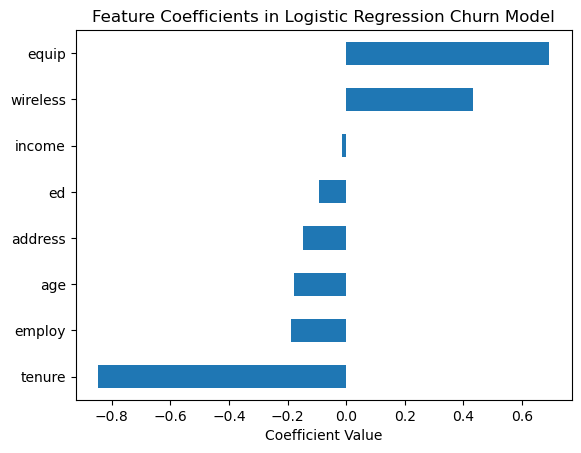

In [45]:
coefficients = pd.Series(LR.coef_[0], index=churn_df3.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [46]:
log_loss(y_test, yhat_prob)

0.7227054293985515

Adding the features "callcard" and "wireless"  to the original set of input features and determining the value of log loss.

In [48]:
churn_df4 = churn_df.copy()
churn_df4 = churn_df4[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'callcard', 'churn']]
churn_df4['churn'] = churn_df4['churn'].astype('int')
churn_df4

,tenure,age,address,income,ed,employ,equip,wireless,callcard,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0.0,1.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0.0,1.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0.0,1.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1


In [49]:
X = np.asarray(churn_df4[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'callcard']])
X[0:5] 

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   0.,   1.]])

In [50]:
y = np.asarray(churn_df4['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [51]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  1.56469673,  0.64686916],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -0.63910148, -1.54590766],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -0.63910148, -1.54590766],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  1.56469673,  0.64686916],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695, -0.63910148,  0.64686916]])

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

In [53]:
LR = LogisticRegression().fit(X_train,y_train)

In [54]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [55]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.90733735, 0.09266265],
       [0.77549537, 0.22450463],
       [0.66214559, 0.33785441],
       [0.96848664, 0.03151336],
       [0.75356895, 0.24643105],
       [0.8862658 , 0.1137342 ],
       [0.7345777 , 0.2654223 ],
       [0.71652816, 0.28347184],
       [0.31812949, 0.68187051],
       [0.84908301, 0.15091699]])

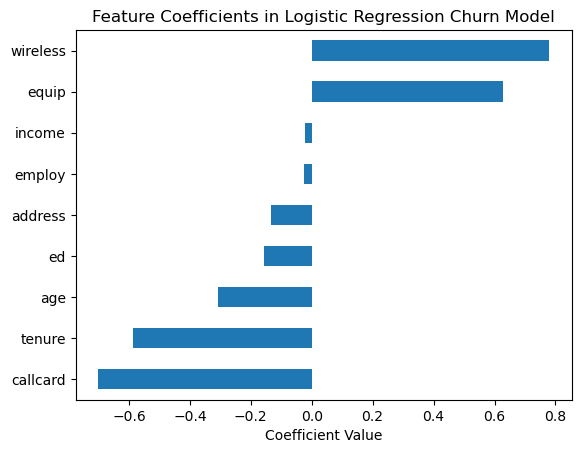

In [56]:
coefficients = pd.Series(LR.coef_[0], index=churn_df4.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [57]:
log_loss(y_test, yhat_prob)

0.7760557225417114

Removing the feature 'equip' to the original set of input features and determining the value of log loss.

In [59]:
churn_df5 = churn_df.copy()
churn_df5 = churn_df5[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'churn']]
churn_df5['churn'] = churn_df5['churn'].astype('int')
churn_df5

,tenure,age,address,income,ed,employ,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0
...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,1


In [60]:
X = np.asarray(churn_df5[['tenure', 'age', 'address', 'income', 'ed', 'employ']])
X[0:5] 

array([[ 11.,  33.,   7., 136.,   5.,   5.],
       [ 33.,  33.,  12.,  33.,   2.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.],
       [ 38.,  35.,   5.,  76.,   2.,  10.],
       [  7.,  35.,  14.,  80.,   2.,  15.]])

In [61]:
y = np.asarray(churn_df5['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [62]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472]])

In [63]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

In [64]:
LR = LogisticRegression().fit(X_train,y_train)

In [65]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [66]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.83176135, 0.16823865],
       [0.90923185, 0.09076815],
       [0.80668816, 0.19331184],
       [0.89769641, 0.10230359],
       [0.75685775, 0.24314225],
       [0.63971421, 0.36028579],
       [0.54536777, 0.45463223],
       [0.89628447, 0.10371553],
       [0.36242837, 0.63757163],
       [0.91797445, 0.08202555]])

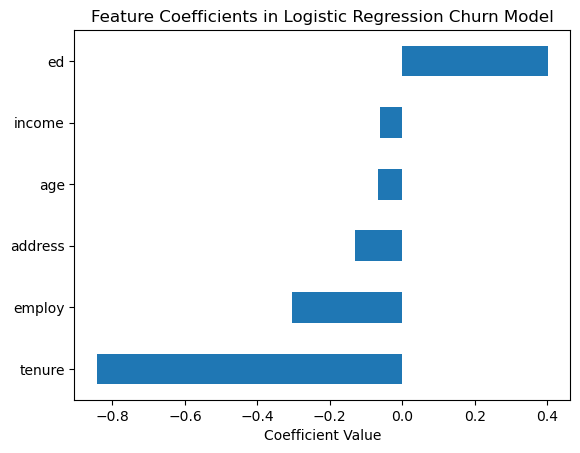

In [67]:
coefficients = pd.Series(LR.coef_[0], index=churn_df5.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [68]:
log_loss(y_test, yhat_prob)

0.5302427350245369

Removing the features 'income' and 'employ' from the original set of input features

In [70]:
churn_df6 = churn_df.copy()
churn_df6 = churn_df6[['tenure', 'age', 'address', 'ed', 'equip', 'churn']]
churn_df6['churn'] = churn_df6['churn'].astype('int')
churn_df6

,tenure,age,address,ed,equip,churn
0,11.0,33.0,7.0,5.0,0.0,1
1,33.0,33.0,12.0,2.0,0.0,1
2,23.0,30.0,9.0,1.0,0.0,0
3,38.0,35.0,5.0,2.0,1.0,0
4,7.0,35.0,14.0,2.0,0.0,0
...,...,...,...,...,...,...
195,55.0,44.0,24.0,1.0,0.0,0
196,34.0,23.0,3.0,1.0,0.0,0
197,6.0,32.0,10.0,1.0,0.0,0
198,24.0,30.0,0.0,4.0,0.0,1


In [71]:
X = np.asarray(churn_df6[['tenure', 'age', 'address', 'ed', 'equip']])
X[0:5]

array([[11., 33.,  7.,  5.,  0.],
       [33., 33., 12.,  2.,  0.],
       [23., 30.,  9.,  1.,  0.],
       [38., 35.,  5.,  2.,  1.],
       [ 7., 35., 14.,  2.,  0.]])

In [72]:
y = np.asarray(churn_df6['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [73]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  1.6961288 , -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.6433592 , -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -1.42318853, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219, -0.6433592 ,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574, -0.6433592 , -0.85972695]])

In [74]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

In [75]:
LR = LogisticRegression().fit(X_train,y_train)

In [76]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [77]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.73497961, 0.26502039],
       [0.92949878, 0.07050122],
       [0.82414689, 0.17585311],
       [0.93319264, 0.06680736],
       [0.8707115 , 0.1292885 ],
       [0.73639159, 0.26360841],
       [0.79160458, 0.20839542],
       [0.89521769, 0.10478231],
       [0.26442359, 0.73557641],
       [0.95254786, 0.04745214]])

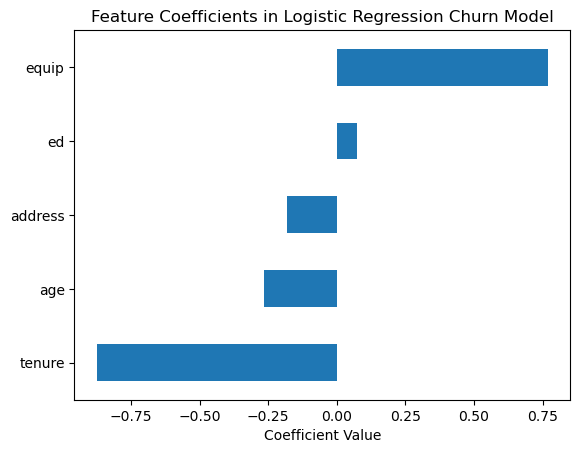

In [78]:
coefficients = pd.Series(LR.coef_[0], index=churn_df6.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [79]:
log_loss(y_test, yhat_prob)

0.6529317169884828

The model having a subset of the following features 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'callcard' as it X variables has the highest log loss value which implies that it is the best the model.